# What are typical atmospheric resolutions of CMIP6 class models

In [42]:
from xmip.utils import google_cmip_col
import numpy as np
import matplotlib.pyplot as plt

In [2]:
col = google_cmip_col()

<frozen importlib._bootstrap>:228: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 96 from PyObject


In [52]:
cat = col.search(grid_label='gn', variable_id='ta', experiment_id='historical')
cat#.df['variable_id'].unique()

,unique
activity_id,1
institution_id,23
source_id,42
experiment_id,1
member_id,151
table_id,8
variable_id,1
grid_label,1
zstore,587
dcpp_init_year,0


In [53]:
ddict = cat.to_dataset_dict(xarray_open_kwargs={'consolidated':True}, aggregate=False)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


In [54]:
resolutions = [(ds.attrs.get('source_id', 'unknown'), ds.attrs.get('nominal_resolution', 'na')) for source_id,ds in ddict.items()]

In [55]:
# resolutions

In [56]:
def all_items_equal(lst):
    return all([i==lst[0] for i in lst])

source_ids = cat.df['source_id'].unique()
res_dict = {}
for source_id in source_ids:
    res_dict[source_id] = []
    for si, res in resolutions:
        if si == source_id:
            res_dict[source_id].append(res)
            
    if all_items_equal(res_dict[source_id]):
        res_dict[source_id] = res_dict[source_id][0]
    else:
        print(f'not all the resolutions are the same for {source_id}')   

In [57]:
len(res_dict)

42

In [58]:
res_data = np.array([int(res.replace(' km','')) for res in res_dict.values()])

Text(0, 0.5, 'count of unique source_ids')

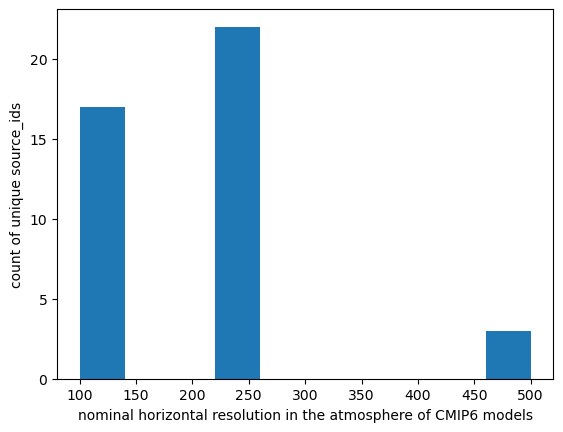

In [59]:
plt.hist(res_data)
plt.xlabel('nominal horizontal resolution in the atmosphere of CMIP6 models')
plt.ylabel('count of unique source_ids')